In [1]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
from sklearn.linear_model import LogisticRegression #  Logistic Regression (aka logit) classifier in linear model
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Datafram

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

## Load Data

In [2]:
# Read-in the dataset
Insurance_Data = pd.read_csv(r'carInsurance_train.csv')
print('Train Data Shape - ', Insurance_Data.shape)
Insurance_Data.head()

Train Data Shape -  (4000, 19)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


### Lets check the data type

In [3]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

## Lets Generate a Data Profiling Report

In [4]:
#pp.ProfileReport(Insurance_Data)

# EDA

### Let's check the summary fo data 

In [5]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [6]:
# This is how we can get summary for the categorical data
Insurance_Data.describe(include=np.object) 

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


### Univariate Analysis

**Lets analyse the data w.r.t our Target variable**

In [7]:
Target = 'CarInsurance'
pd.crosstab(Insurance_Data[Target], columns='N', normalize=True) # normalize=True means calculate %

col_0,N
CarInsurance,
0,0.599
1,0.401


**The data seems to be quiet good as we have approx. 40% of 1's in our data**

### Visualising Data - Bivariate

In [8]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [9]:
num_cols = Insurance_Data.select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.select_dtypes(exclude=[np.number]).columns.tolist()


In [10]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome', 'CallStart', 'CallEnd']


In [11]:
# Lets drop columns which we will not use
num_cols = Insurance_Data.drop(['Id', 'CarInsurance'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.drop(['CallStart', 'CallEnd'],axis=1).select_dtypes(exclude=[np.number]).columns.tolist()


In [12]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


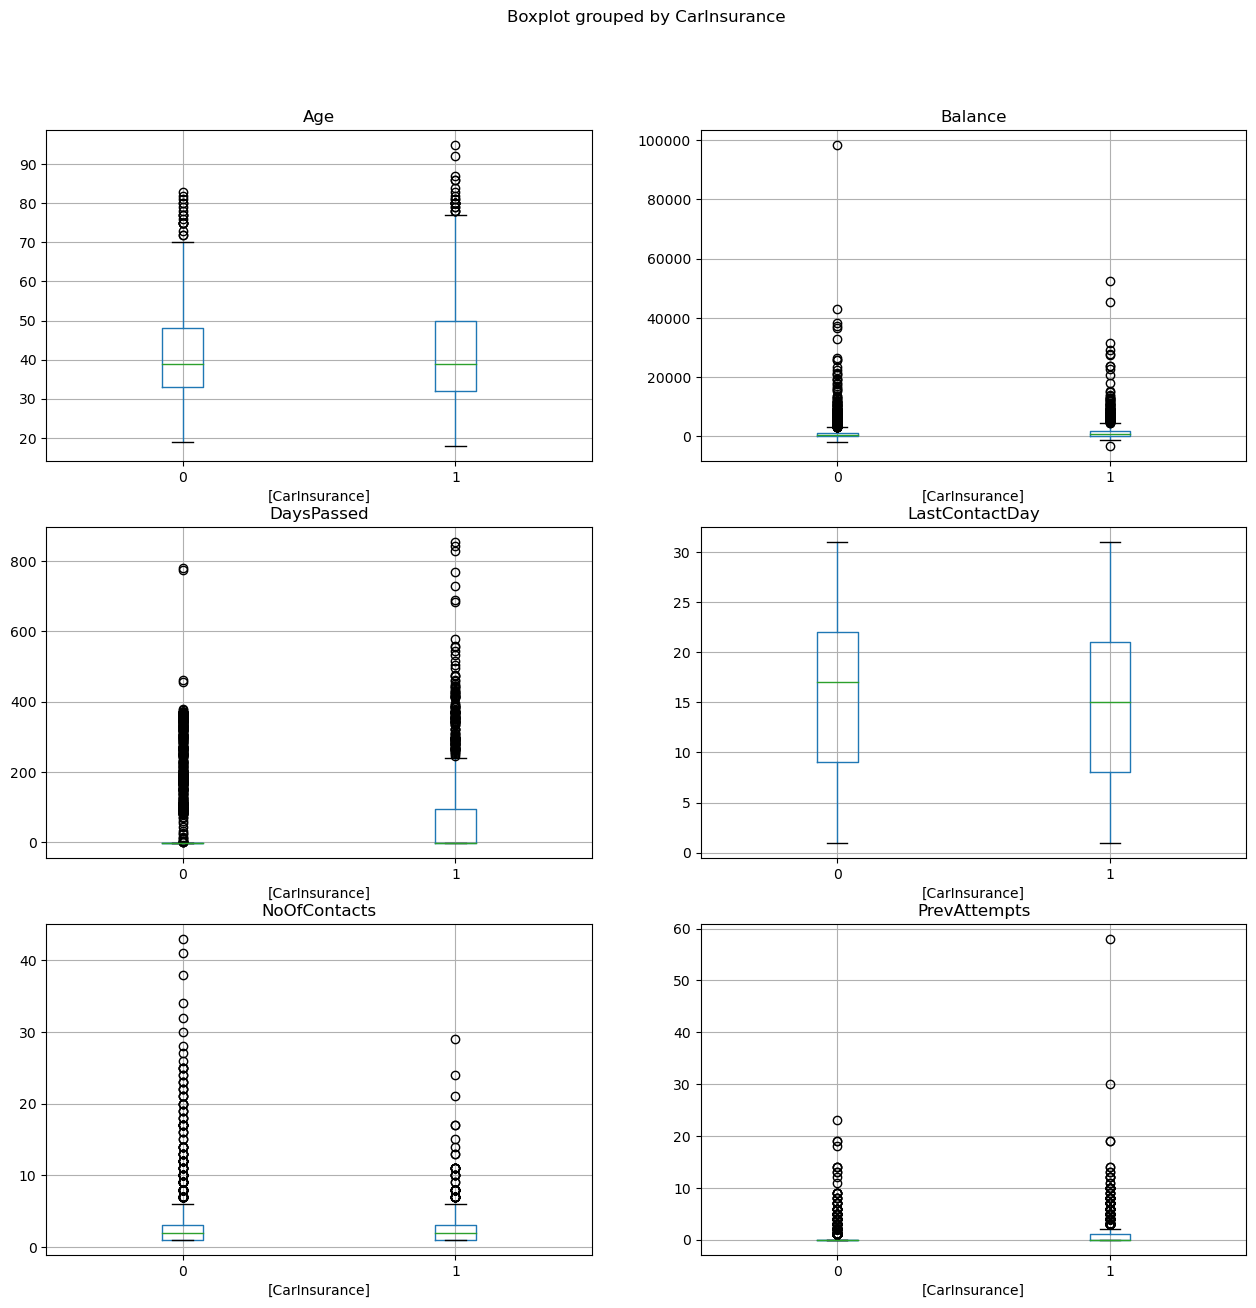

In [13]:
# Lets drop CarLoan, HHInsurance, Default from the numeric columns as these are dummies
num_cols_viz = ['DaysPassed', 'Age', 'NoOfContacts', 'PrevAttempts', 'LastContactDay', 'Balance']

# sharex and sharey is used to give every plot should have own axis
# to give plane with 0 to 1 lim on both side
fig, axes = plt.subplots(3,2,sharex=False,sharey=False, figsize=(15,15)) 
Insurance_Data.loc[:,[Target]+num_cols_viz].boxplot(by=Target, ax=axes,return_type='axes');

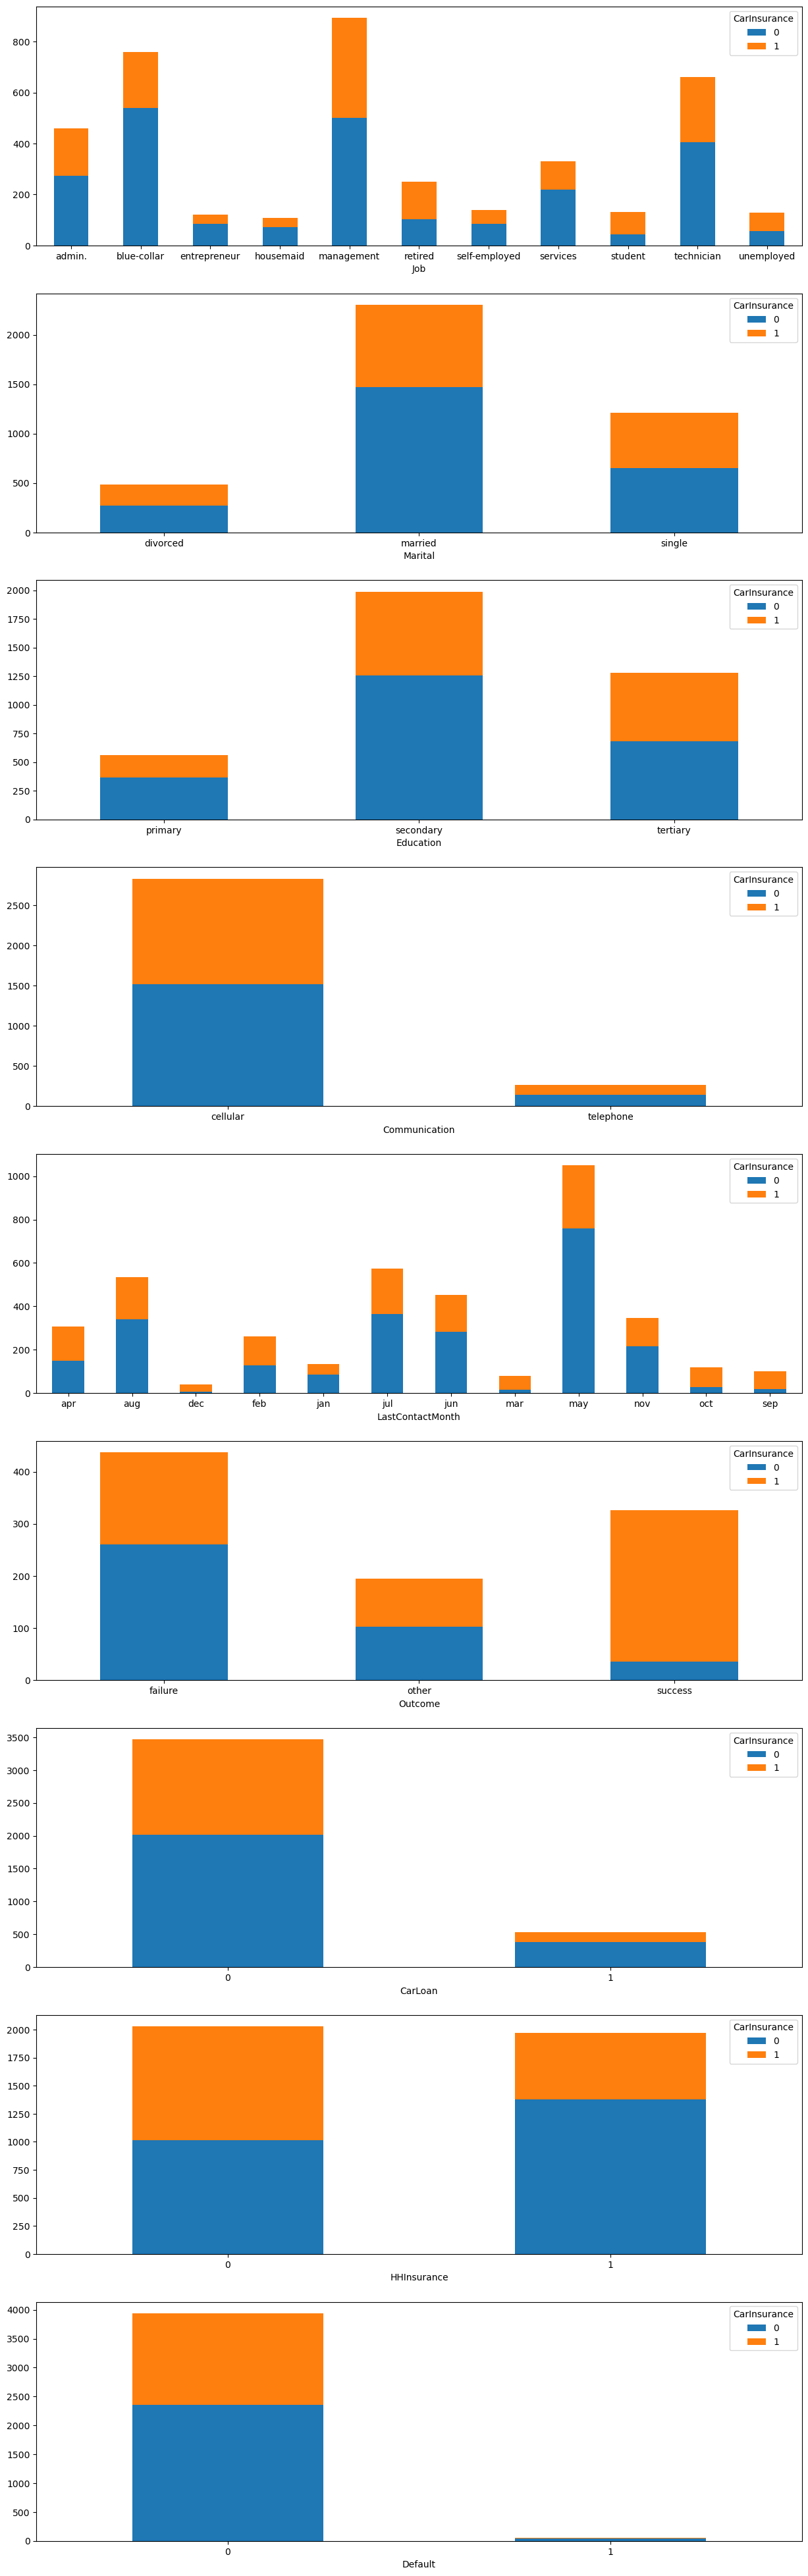

In [14]:
non_num_cols_viz = non_num_cols+['CarLoan', 'HHInsurance', 'Default']
fig, axes = plt.subplots(len(non_num_cols_viz),sharex=False,sharey=False, figsize=(15,50))
for i in range(len(non_num_cols_viz)):
    pd.crosstab(Insurance_Data[non_num_cols_viz[i]], Insurance_Data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  grid=False, sharex=False,ax=axes[i],
   # sharex=False every plot should have different axis                                                                               ax=axes[i],
                                                                                  rot=0)
    # rot =0 is to get label in horizontal format 
        

* The JobType='Retired' seem to have higher chance of buying insurance
* The Communication='cellular' seem to best way to reach out for insurance

## Check for Missing Values

In [15]:
Insurance_Data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

**Looks like variables Job, Education, Communication & Outcome have missing values. Lets analyse them and treat them accordingly**

# Missing Values - Job

In [16]:
Insurance_Data_Org = Insurance_Data.copy()

In [17]:
Insurance_Data['Job'].value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

Lets replace the missing with None. This will help us in handling missing values in future as well.

In [18]:
Insurance_Data['Job'] = Insurance_Data['Job'].fillna('None')
Insurance_Data['Job'].isnull().sum()

0

## Education

In [19]:
# Fill missing education with the most common education level by job type
Insurance_Data['Education'].value_counts()

# Create job-education level mode mapping
edu_mode=[]

# What are different Job Types
job_types = Insurance_Data.Job.value_counts().index

# Checking which job is most 
Insurance_Data['Job'].value_counts()

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
None              19
Name: Job, dtype: int64

In [20]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.
# It means when there are many people in the managment job then most of them are in which education.
# We can find that in below mapping


# nlargest(1) select only one level which is highest count level in education 
for job in job_types:
    mode = Insurance_Data[Insurance_Data.Job==job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=Insurance_Data.Job.value_counts().index)

edu_map

# basic model calculation

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [21]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

In [22]:
# Apply the mapping to missing eductaion obs. We will replace education now by jobs value
#  for none 
for j in job_types:
    Insurance_Data.loc[(Insurance_Data['Education'].isnull()) & (Insurance_Data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None
Insurance_Data['Education'].fillna('None',inplace=True)

In [23]:
edu_map.loc[edu_map.index==j][0]

'secondary'

In [24]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    2117
tertiary     1318
primary       565
Name: Education, dtype: int64

## communication

In [25]:
# Fill missing communication with none 
Insurance_Data['Communication'].value_counts(dropna=False)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

In [26]:
Insurance_Data['Communication'] = Insurance_Data['Communication'].fillna('None')

## Outcome

In [27]:
# Check for missing value in Outcome
Insurance_Data['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [28]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.

Insurance_Data.loc[Insurance_Data['DaysPassed']==-1,'Outcome']='NoPrev'
Insurance_Data['Outcome'].value_counts(dropna=False)

NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [29]:
# Check if we have any missing values left
Insurance_Data.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

# Subset of data

* number subset 
* Categorical subset

In [30]:
Insurance_Data_num = Insurance_Data[num_cols+['Id', 'CarInsurance']]

In [31]:
# Categorical columns data
Insurance_Data_cat = Insurance_Data[non_num_cols]
non_num_cols

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [32]:
# Create dummies
Insurance_Data_cat_dummies = pd.get_dummies(Insurance_Data_cat)
print(Insurance_Data_cat_dummies.shape)
Insurance_Data_cat_dummies.head()

(4000, 37)


,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Merge the 2 File (number & Categorical)

In [33]:
Insurance_Data_final = pd.concat([Insurance_Data_num, Insurance_Data_cat_dummies], axis=1)
print(Insurance_Data_final.shape)
Insurance_Data_final.head()

(4000, 48)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,32,0,1156,1,0,26,5,-1,0,2,...,0,0,1,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,3,...,1,0,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,4,...,0,0,1,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,5,...,1,0,0,0,0,0,1,0,0,0


In [34]:
# Checking if there are missing values before we run model
Insurance_Data_final.isnull().sum(axis = 0)

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Id                         0
CarInsurance               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMon

## Data Partition

In [35]:
train_df = Insurance_Data_final.drop(['Id', 'CarInsurance'], axis=1)
train_label = Insurance_Data_final['CarInsurance']

In [36]:
#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7 , random_state=100)

In [37]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 46)
Test shape  -  (1200, 46)


## Model Building

In [38]:
from sklearn.linear_model import RidgeClassifier

In [39]:
final_mod = RidgeClassifier(alpha=0.1)

In [40]:
final_mod.fit(X_train, y_train)

RidgeClassifier(alpha=0.1)

### Coefficent of Model

In [41]:
print(final_mod.coef_)

[[ 2.37679956e-03 -2.23767134e-02 -4.95875200e-07 -2.14845871e-01
  -1.16690853e-01 -2.16286405e-03 -2.04281106e-02  1.02370334e-04
   2.13539880e-02 -2.11576460e-01  3.83160115e-02 -1.30490015e-02
  -1.57199537e-01 -2.08489254e-02 -2.61280138e-02  1.07347284e-01
  -2.12293032e-01  4.15803888e-02  2.43112531e-01  3.01972832e-03
   2.07719026e-01  5.88461171e-02 -1.02050477e-01  4.32043603e-02
  -3.30910924e-02 -5.01867871e-02  8.32778795e-02 -3.00288864e-01
   1.58346246e-01  1.41942618e-01  7.04263973e-02 -3.34000479e-01
   2.87579948e-01 -4.69867954e-02 -3.89390280e-01 -1.89688418e-01
   4.86275379e-02  3.74997419e-01 -1.05317417e-01 -2.95240338e-01
   3.59176749e-01  2.19815676e-01 -8.17308190e-02 -2.57365240e-01
  -1.94524063e-01  5.33620122e-01]]


In [42]:
print(final_mod.intercept_)  


[0.04547281]


## Predictions on Train Dataset

In [43]:
# Prediction
train_pred = final_mod.predict(X_train)

In [44]:
train=pd.concat([X_train,y_train],axis=1)

In [45]:
train['Predicted']=train_pred

## Model Performance Metrics

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['CarInsurance'],train['Predicted'])
print(confusion_matrix)

[[1468  195]
 [ 600  537]]


In [47]:
Accuracy_Train=((1468+537)/(1468+537+195+600)*100)
print(Accuracy_Train)

71.60714285714286


## Predictions on Test Dataset

In [48]:
test_pred = final_mod.predict(X_test)

In [49]:
test=pd.concat([X_test,y_test],axis=1)

In [50]:
test['Predicted']=test_pred

## Model Performance Test data

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['CarInsurance'],test['Predicted'])
print(confusion_matrix)

[[651  82]
 [236 231]]


In [52]:
Accuracy_Test=((651+231)/(651+231+82+236)*100)
print(Accuracy_Test)

73.5


In [53]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))


Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.71      0.88      0.79      1663
           1       0.73      0.47      0.57      1137

    accuracy                           0.72      2800
   macro avg       0.72      0.68      0.68      2800
weighted avg       0.72      0.72      0.70      2800

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80       733
           1       0.74      0.49      0.59       467

    accuracy                           0.73      1200
   macro avg       0.74      0.69      0.70      1200
weighted avg       0.74      0.73      0.72      1200



In [54]:
coefs = pd.DataFrame(list(final_mod.coef_.ravel()),
                        list(X_train.columns)).reset_index()
coefs.columns = ['feature', 'coefficient']
coefs = coefs.sort_values(by='coefficient', ascending=False)


In [55]:
coefs

,feature,coefficient
45,Outcome_success,5.336201e-01
37,LastContactMonth_mar,3.749974e-01
40,LastContactMonth_oct,3.591767e-01
32,LastContactMonth_dec,2.875799e-01
18,Job_student,2.431125e-01
41,LastContactMonth_sep,2.198157e-01
20,Job_unemployed,2.077190e-01
28,Communication_cellular,1.583462e-01
29,Communication_telephone,1.419426e-01
15,Job_retired,1.073473e-01


<AxesSubplot:ylabel='feature'>

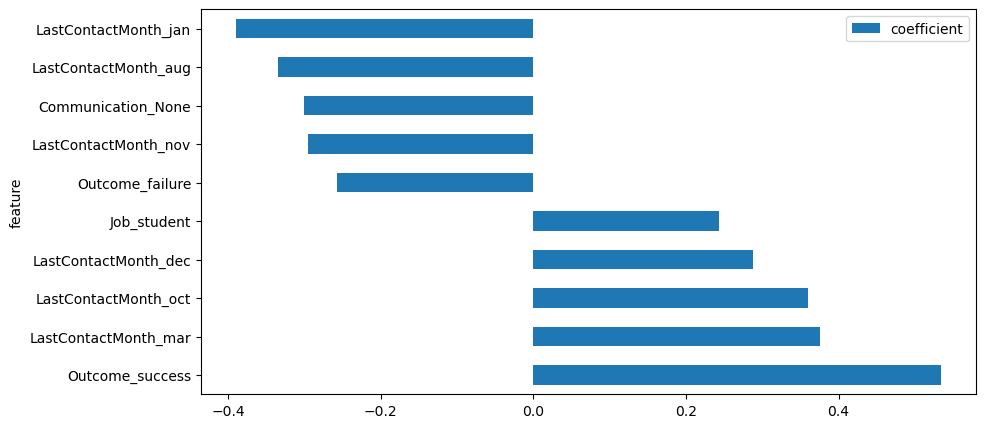

In [56]:
# Select top 5 features to display
top_features = coefs[:5]
top_features = top_features.sort_values(by='coefficient', ascending=False)

# Select bottom 5 features to display
bottom_features = coefs[-5:]
bottom_features = bottom_features.sort_values(
    by='coefficient', ascending=False)

# Display 10 most important features
pd.concat([top_features, bottom_features], axis=0).plot(
    kind='barh', figsize=(10, 5), x='feature')


In [57]:
top_features

,feature,coefficient
45,Outcome_success,0.533620
37,LastContactMonth_mar,0.374997
40,LastContactMonth_oct,0.359177
32,LastContactMonth_dec,0.287580
18,Job_student,0.243113
